In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,learning_curve
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
hour_df=pd.read_csv("F:/MyLife/9. DataSets-20190613T131859Z-001/9. DataSets/Bike-Sharing-Dataset/day.csv")
hour_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
#know structure
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#know missing values
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#remove unnecessary column
hour_df.drop('instant',axis=1,inplace=True)
hour_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Text(0, 0.5, 'counts')

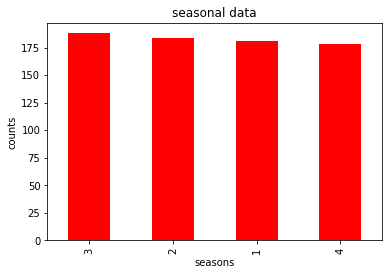

In [7]:
#bar plot to know the counts of the individual seasons
pd.value_counts(hour_df['season']).plot.bar(color = 'r')
plt.title('seasonal data')
plt.xlabel('seasons')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

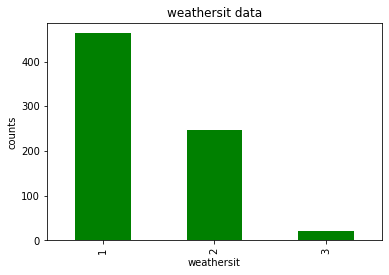

In [8]:
#bar plot to know the counts of the individual weather condition
pd.value_counts(hour_df['weathersit']).plot.bar(color = 'g')
plt.title('weathersit data')
plt.xlabel('weathersit')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

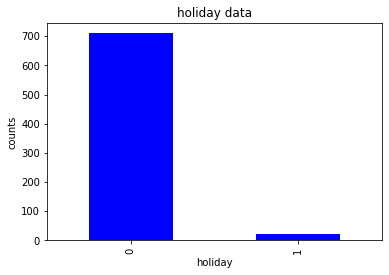

In [9]:
#bar plot to know the counts of the individual holiday or non holiday
pd.value_counts(hour_df['holiday']).plot.bar(color = 'b')
plt.title('holiday data')
plt.xlabel('holiday')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

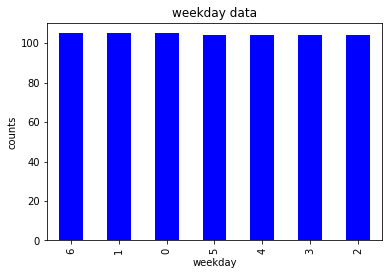

In [10]:
#bar plot to know the counts and data distribution for weekday
pd.value_counts(hour_df['weekday']).plot.bar(color = 'b')
plt.title('weekday data')
plt.xlabel('weekday')
plt.ylabel('counts')

In [11]:
#know basic statistic details
hour_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


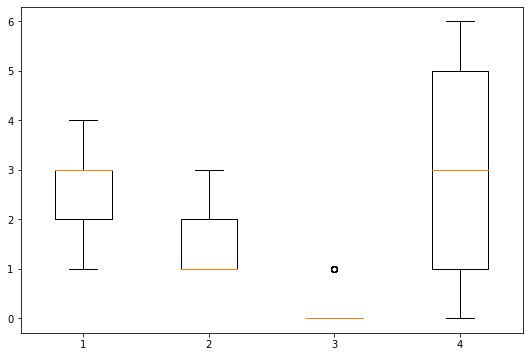

In [12]:
#visualize the dataset
fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot("111")
bp = ax.boxplot([hour_df['season'],hour_df['weathersit'],hour_df['holiday'],hour_df['weekday']])
fig.savefig('fig1.png', bbox_inches='tight')

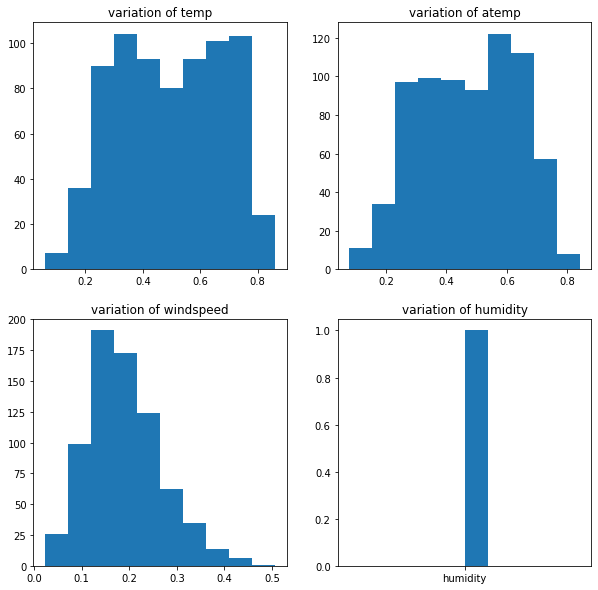

In [13]:
#histogram for continuous variable
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x='temp',data=hour_df)
axes[0,0].set_title('variation of temp')
axes[0,1].hist(x='atemp',data=hour_df)
axes[0,1].set_title('variation of atemp')
axes[1,0].hist(x='windspeed',data=hour_df)
axes[1,0].set_title('variation of windspeed')
axes[1,1].hist(x='humidity',data=hour_df)
axes[1,1].set_title('variation of humidity')
fig.set_size_inches(10,10)

In [14]:
y=hour_df['cnt']
hour_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [15]:
corr_matrix = hour_df.corr().abs()
corr_matrix

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,0.001844,0.831440,0.010537,0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,0.229046,0.210399,0.411623,0.406100
yr,0.001844,1.000000,0.001792,0.007954,0.005461,0.002013,0.048727,0.047604,0.046106,0.110651,0.011817,0.248546,0.594248,0.566710
mnth,0.831440,0.001792,1.000000,0.019191,0.009509,0.005901,0.043528,0.220205,0.227459,0.222204,0.207502,0.123006,0.293488,0.279977
holiday,0.010537,0.007954,0.019191,1.000000,0.101960,0.253023,0.034627,0.028556,0.032507,0.015937,0.006292,0.054274,0.108745,0.068348
weekday,0.003080,0.005461,0.009509,0.101960,1.000000,0.035790,0.031087,0.000170,0.007537,0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,0.002013,0.005901,0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,0.018796,0.518044,0.303907,0.061156
weathersit,0.019211,0.048727,0.043528,0.034627,0.031087,0.061200,1.000000,0.120602,0.121583,0.591045,0.039511,0.247353,0.260388,0.297391
temp,0.334315,0.047604,0.220205,0.028556,0.000170,0.052660,0.120602,1.000000,0.991702,0.126963,0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,0.032507,0.007537,0.052182,0.121583,0.991702,1.000000,0.139988,0.183643,0.543864,0.544192,0.631066
hum,0.205445,0.110651,0.222204,0.015937,0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,0.248489,0.077008,0.091089,0.100659


In [16]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop

['mnth', 'atemp', 'hum', 'casual', 'registered', 'cnt']

In [17]:
hour_df = hour_df.drop(hour_df[to_drop], axis=1)

In [18]:
X =hour_df.drop(['dteday'], axis=1) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1)

In [19]:
models=[LinearRegression(),Ridge(),RidgeCV(),Lasso(),LassoCV(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),GradientBoostingRegressor()]
model_names=['LinearRegression','Ridge','RidgeCV','Lasso','LassoCV','SVR','KNeighborsRegressor','RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','GradientBoostingRegressor']

In [20]:
rmsle=[]
mse = []
mae = []
score = []
d={}

In [21]:
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    #if not ((y_test >= 0).all() and (test_pred >= 0).all()):
    #rmsle.append(mean_squared_log_error(y_test,test_pred))
    rmsle.append(np.sqrt(np.mean(np.power(np.log(np.array(y_test)+1) - np.log(np.array(test_pred)+1), 2))))
    mae.append(mean_absolute_error(y_test,test_pred))
    mse.append(mean_squared_error(y_test,test_pred))
    score.append(r2_score(y_test,test_pred)*100)

In [22]:
d={'Modelling Algorithm':model_names,'RMSLE':rmsle,'MAE':mae,'MSE':mse,'r2score':score}   
d

{'Modelling Algorithm': ['LinearRegression',
  'Ridge',
  'RidgeCV',
  'Lasso',
  'LassoCV',
  'SVR',
  'KNeighborsRegressor',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor'],
 'RMSLE': [0.4267869317237456,
  0.4250981973205667,
  0.42633158257458537,
  0.42458394822426304,
  0.42398199854371244,
  0.6837329016166317,
  0.46210181083288865,
  0.4194508115634769,
  0.424577807004213,
  0.4237355148955794,
  0.38990830894478873],
 'MAE': [621.4029648791789,
  625.0861821672795,
  621.2842613117868,
  621.416856506691,
  621.5831195302959,
  1675.3801302710476,
  745.4811475409836,
  578.144262295082,
  664.6596263885867,
  552.69631147541,
  501.00410995671666],
 'MSE': [777285.9346862662,
  798665.5986800245,
  779240.3561092222,
  782343.2757839232,
  784702.2654448698,
  4025777.465644173,
  1072027.6391803278,
  667921.6735245902,
  789856.4901455194,
  666745.0571721311,
  497130.8937318506],
 'r2score': [80.25137983439114,
  79

In [23]:
rmsle_frame = pd.DataFrame(d)
rmsle_frame

,Modelling Algorithm,RMSLE,MAE,MSE,r2score
0,LinearRegression,0.426787,621.402965,7.772859e+05,80.251380
1,Ridge,0.425098,625.086182,7.986656e+05,79.708184
2,RidgeCV,0.426332,621.284261,7.792404e+05,80.201724
3,Lasso,0.424584,621.416857,7.823433e+05,80.122887
4,LassoCV,0.423982,621.583120,7.847023e+05,80.062952
5,SVR,0.683733,1675.380130,4.025777e+06,-2.283531
6,KNeighborsRegressor,0.462102,745.481148,1.072028e+06,72.762833
7,RandomForestRegressor,0.419451,578.144262,6.679217e+05,83.030014
8,AdaBoostRegressor,0.424578,664.659626,7.898565e+05,79.931998
9,BaggingRegressor,0.423736,552.696311,6.667451e+05,83.059908


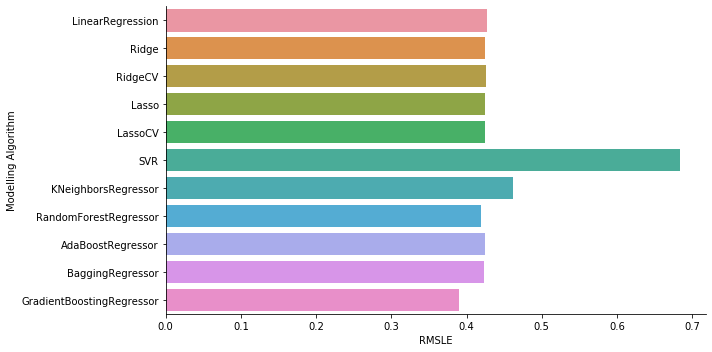

In [24]:
sns.factorplot(y='Modelling Algorithm',x='RMSLE',data=rmsle_frame[:],kind='bar',size=5,aspect=2)

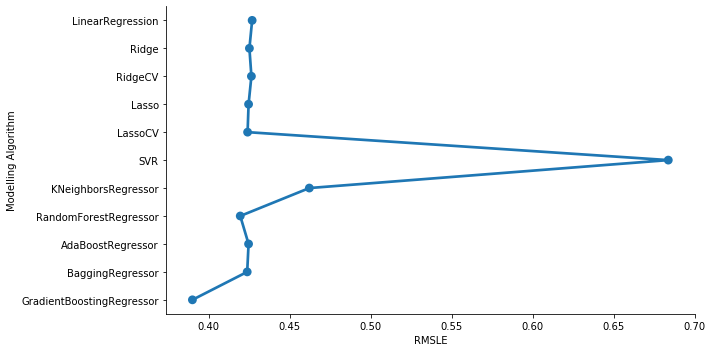

In [25]:
sns.factorplot(y='Modelling Algorithm',x='RMSLE',data=rmsle_frame[:],kind='point',size=5,aspect=2)

In [26]:
no_of_estimators = [1000]
params_dict = {'n_estimators':no_of_estimators,'n_jobs':[-1],'max_features':['auto','sqrt','log2']}
randomRegressor = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,cv=7)
randomRegressor.fit(X_train,y_train)
pred = randomRegressor.predict(X_test)
print(mean_squared_log_error(y_test,pred))
print(r2_score(y_test,pred)*100)

0.1666301966451544
85.43505226607604


In [27]:
#Adaboost
no_of_estimators = [50,100,150]
params_dict = {'n_estimators':no_of_estimators,'loss':['linear','square','exponential'],'learning_rate':[0.1,1,10]}
adaBoostRegressor = GridSearchCV(estimator=AdaBoostRegressor(),param_grid=params_dict,cv=7)
adaBoostRegressor.fit(X_train,y_train)
pred = adaBoostRegressor.predict(X_test)
print(mean_squared_log_error(y_test,pred))
print(r2_score(y_test,pred)*100)
print(adaBoostRegressor.best_estimator_,adaBoostRegressor.best_params_)

0.19163032023272195
77.98546292570398
AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='exponential',
                  n_estimators=150, random_state=None) {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}


In [28]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
n_neighbors
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
knnRegressor=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,cv=7)
knnRegressor.fit(X_train,y_train)
pred=knnRegressor.predict(X_test)
print(mean_squared_log_error(y_test,pred))
print(r2_score(y_test,pred)*100)
print(knnRegressor.best_estimator_,knnRegressor.best_params_)

0.21353808357503481
72.76283320146287
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform') {'n_jobs': -1, 'n_neighbors': 5}


In [29]:
#Bagging
no_of_estimators = [100]
params_dict = {'n_estimators':no_of_estimators,'n_jobs':[-1]}
baggingRegressor = GridSearchCV(estimator=BaggingRegressor(),param_grid=params_dict,cv=7)
baggingRegressor.fit(X_train,y_train)
pred = baggingRegressor.predict(X_test)
print(mean_squared_log_error(y_test,pred))
print(r2_score(y_test,pred)*100)
print(baggingRegressor.best_estimator_,baggingRegressor.best_params_)

0.1726705597466853
84.08683361713031
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100, n_jobs=-1,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False) {'n_estimators': 100, 'n_jobs': -1}


In [30]:
#Gradient
no_of_estimators = [50,100,150]
params_dict = {'n_estimators':no_of_estimators,'loss':['ls','lad','huber','quantile'],'learning_rate':[0.01,0.1,1,10]}
gradientRegressor = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=params_dict,cv=7)
gradientRegressor.fit(X_train,y_train)
pred = gradientRegressor.predict(X_test)
print(mean_squared_log_error(y_test,pred))
print(r2_score(y_test,pred)*100)
print(gradientRegressor.best_estimator_,gradientRegressor.best_params_)

0.151855125421918
87.41931597494461
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) {'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 100}


In [49]:
def plot_learningCurve(regressor,x,y,train_sizes,cv,verbose):
    train_sizes,train_score,validation_score = learning_curve(regressor,x,y,train_sizes=train_sizes,cv=cv,verbose=verbose)
    train_mean = np.mean(train_score,axis=1)
    train_std = np.std(train_score,axis=1)
    test_mean = np.mean(validation_score,axis=1)
    test_std = np.std(validation_score,axis=1)
    
    plt.plot(train_sizes,train_mean,label='train score')
    plt.plot(train_sizes,test_mean,label='validation score')
    plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
    plt.fill_between(train_sizes,test_mean-train_std,train_mean+train_std,color='#DDDDDD')
    
    plt.xlabel('Train sizes')
    plt.ylabel('validation scores')
    plt.title('Learning curve for training and testing')
    plt.show()

In [50]:
plot_learningCurve(RandomForestRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

ValueError: 'neg_root_mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

[learning_curve] Training set sizes: [  4  10  16  22  28  34  40  46  52  58  64  69  75  81  87  93  99 105
 111 117 123 129 135 141 147 153 159 165 171 177 183 189 195 201 207 213
 219 225 231 237 243 249 255 261 267 273 279 285 291 297 303 309 315 321
 327 333 339 345 351 357 363 369 375 381 387 393 399 405 411 417]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:   48.0s finished


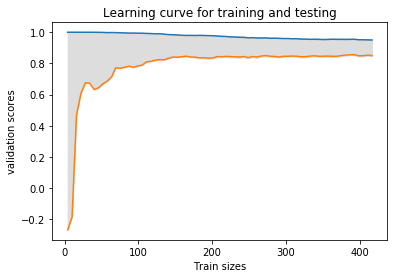

In [33]:
plot_learningCurve(GradientBoostingRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

[learning_curve] Training set sizes: [  4   8  12  16  20  25  29  33  37  41  45  50  54  58  62  66  70  75
  79  83  87  91  95 100 104 108 112 116 120 125 129 133 137 141 145 150
 154 158 162 166 170 175 179 183 187 191 195 200 204 208 212 216 221 225
 229 233 237 241 246 250 254 258 262 266 271 275 279 283 287 291 296 300
 304 308 312 316 321 325 329 333 337 341 346 350 354 358 362 366 371 375
 379 383 387 391 396 400 404 408 412 417]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  2.1min finished


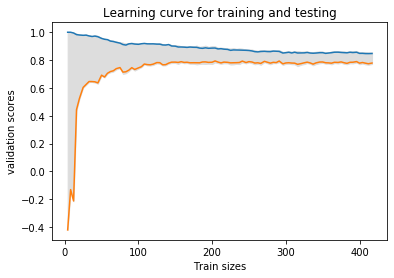

In [34]:
plot_learningCurve(AdaBoostRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,100),cv=7,verbose=1)

[learning_curve] Training set sizes: [  4  10  16  22  28  34  40  46  52  58  64  69  75  81  87  93  99 105
 111 117 123 129 135 141 147 153 159 165 171 177 183 189 195 201 207 213
 219 225 231 237 243 249 255 261 267 273 279 285 291 297 303 309 315 321
 327 333 339 345 351 357 363 369 375 381 387 393 399 405 411 417]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:   23.6s finished


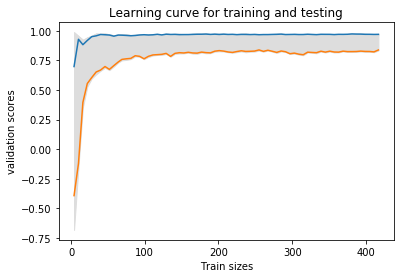

In [37]:
plot_learningCurve(BaggingRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

[learning_curve] Training set sizes: [  4  10  16  22  28  34  40  46  52  58  64  69  75  81  87  93  99 105
 111 117 123 129 135 141 147 153 159 165 171 177 183 189 195 201 207 213
 219 225 231 237 243 249 255 261 267 273 279 285 291 297 303 309 315 321
 327 333 339 345 351 357 363 369 375 381 387 393 399 405 411 417]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:    6.5s finished


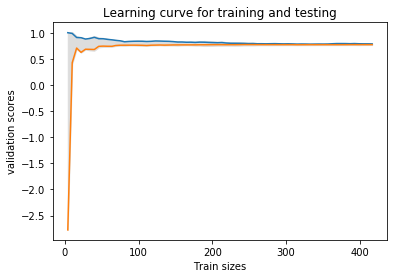

In [38]:
plot_learningCurve(LinearRegression(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

[learning_curve] Training set sizes: [  4  10  16  22  28  34  40  46  52  58  64  69  75  81  87  93  99 105
 111 117 123 129 135 141 147 153 159 165 171 177 183 189 195 201 207 213
 219 225 231 237 243 249 255 261 267 273 279 285 291 297 303 309 315 321
 327 333 339 345 351 357 363 369 375 381 387 393 399 405 411 417]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:    7.7s finished


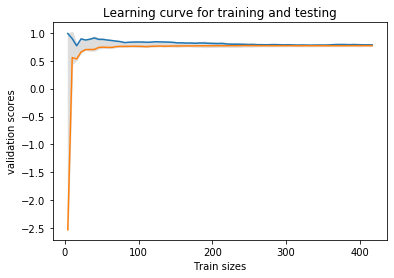

In [41]:
plot_learningCurve(RidgeCV(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

[learning_curve] Training set sizes: [  4  10  16  22  28  34  40  46  52  58  64  69  75  81  87  93  99 105
 111 117 123 129 135 141 147 153 159 165 171 177 183 189 195 201 207 213
 219 225 231 237 243 249 255 261 267 273 279 285 291 297 303 309 315 321
 327 333 339 345 351 357 363 369 375 381 387 393 399 405 411 417]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:   48.6s finished


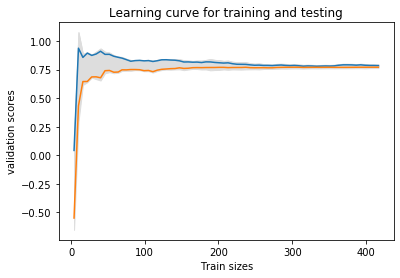

In [40]:
plot_learningCurve(LassoCV(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)